In [ ]:
# Importamos las librerías necesarias
import nltk
import re
import matplotlib as plt
from bs4 import BeautifulSoup
import requests

In [ ]:
# 1. Obtención del contenido de la web (primer párrafo de la página de Turing en español)
res = requests.get("https://es.wikipedia.org/wiki/Alan_Turing")
soup = BeautifulSoup(res.text, 'html.parser')
for idx, item in enumerate(soup.find_all("p")):
    if idx == 1:
        break
print(item.text)

Es considerado uno de los padres de la ciencia de la computación y precursor de la informática moderna. Proporcionó una influyente formalización de los conceptos de algoritmo y computación: la máquina de Turing. Formuló su propia versión que hoy es ampliamente aceptada como la tesis de Church-Turing (1936).


In [ ]:
# 2a. Eliminación de todos los signos de puntuación (los puntos que separan frases, en particular) y el año
dotless_text = re.sub("\.|\(\d+\)|\:","", item.text)
print(dotless_text)

Es considerado uno de los padres de la ciencia de la computación y precursor de la informática moderna Proporcionó una influyente formalización de los conceptos de algoritmo y computación la máquina de Turing Formuló su propia versión que hoy es ampliamente aceptada como la tesis de Church-Turing 


In [ ]:
# 2b. Cambio de todas las palabras a minúsculas
dotless_text_low = dotless_text.lower()

In [ ]:
# 2c. Tokenización
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokenized = word_tokenize(dotless_text_low)
print(tokenized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['es', 'considerado', 'uno', 'de', 'los', 'padres', 'de', 'la', 'ciencia', 'de', 'la', 'computación', 'y', 'precursor', 'de', 'la', 'informática', 'moderna', 'proporcionó', 'una', 'influyente', 'formalización', 'de', 'los', 'conceptos', 'de', 'algoritmo', 'y', 'computación', 'la', 'máquina', 'de', 'turing', 'formuló', 'su', 'propia', 'versión', 'que', 'hoy', 'es', 'ampliamente', 'aceptada', 'como', 'la', 'tesis', 'de', 'church-turing']


In [ ]:
# 2d. Lematización
!pip install stanza

import stanza
stanza.download("es")
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

doc = nlp(dotless_text_low)
lemas_esp = []
words_lemmatized = [ [word.text, word.lemma] for sent in doc.sentences for word in sent.words ]
for words in words_lemmatized:
    lemas_esp.append(words[1])
print(lemas_esp)

In [ ]:
# 2e. Eliminación de términos irrelevantes
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

cleaned_text = [ word for word in lemas if word not in stop_words ]
print(cleaned_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['ser', 'considerar', 'padre', 'ciencia', 'computación', 'precursor', 'informática', 'moderno', 'proporcionar', 'influyente', 'formalización', 'concepto', 'algoritmo', 'computación', 'máquina', 'turing', 'formular', 'propio', 'versión', 'hoy', 'ser', 'ampliamente', 'aceptado', 'tesis', 'church-turing']


2021-12-03 12:18:58 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-12-03 12:18:58 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2021-12-03 12:18:58 INFO: Use device: cpu
2021-12-03 12:18:58 INFO: Loading: tokenize
2021-12-03 12:18:58 INFO: Loading: pos
2021-12-03 12:18:58 INFO: Loading: lemma
2021-12-03 12:18:58 INFO: Done loading processors!


{'v': 24, 'n': 79, 'a': 8, 'r': 2}


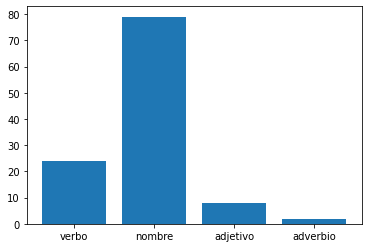

In [ ]:
# 3. Etiquetado del discurso (para la versión en INGLÉS)
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
from nltk.corpus import stopwords
#nltk.download('stopwords')
#!pip install stanza
import stanza
#stanza.download("en")
import matplotlib.pyplot as plt
import numpy as np



def get_part_of_speech(item):
  probable_part_of_speech = wordnet.synsets(item)
  pos_counts = Counter()
  pos_counts["n"] = len ([ item for item in probable_part_of_speech if item.pos() =="n"])
  pos_counts["v"] = len ([ item for item in probable_part_of_speech if item.pos() =="v"])
  pos_counts["a"] = len ([ item for item in probable_part_of_speech if item.pos() =="a"])
  pos_counts["r"] = len ([ item for item in probable_part_of_speech if item.pos() =="r"])
  most_probable_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_probable_part_of_speech

# Extraemos el párrafo
res = requests.get("https://en.wikipedia.org/wiki/Alan_Turing")
soup = BeautifulSoup(res.text, 'html.parser')
for idx, item in enumerate(soup.find_all("p")):
    if idx == 2:
        break

# Lo limpiamos
text_cleaned = re.sub("\.|\(\d+\)|\:|\,|\[?\d\]?","", item.text).lower()

# Lo lematizamos
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')
doc = nlp(text_cleaned)
lemas_eng = []
words_lemmatized = [ [word.text, word.lemma] for sent in doc.sentences for word in sent.words ]
for words in words_lemmatized:
    lemas_eng.append(words[1])

# Eliminamos las palabras irrelevantes
stop_words = set(stopwords.words('english'))
cleaned_text = [ word for word in lemas_eng if word not in stop_words ]


# Averiguamos la parte del discurso de cada término
words_pos = [ get_part_of_speech(word) for word in cleaned_text ]
word_pos_count = dict(Counter(words_pos))


# Representamos cuántas aparaciones hay de cada categoría
eje_x = np.arange(len(word_pos_count))
eje_y = list(word_pos_count.values())
plt.bar(eje_x, eje_y)
plt.xticks(eje_x, ['verbo','nombre','adjetivo','adverbio']);
plt.show()